In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import trendvis
%matplotlib inline
#https://blog.csdn.net/u010383605/article/details/79303877
#https://matplotlib.org/gallery/text_labels_and_annotations/date_index_formatter.html

In [2]:
def format_date(x, pos=None):
        thisind = np.clip(int(x + 0.5), 0, N - 1)
        return date[thisind].strftime('%Y-%m-%d')

In [3]:
#df=pd.read_csv("all_latlon.csv")
df=pd.read_csv("all_latlon-ok.csv")

In [4]:
df.head()

,AREA,PERIMETER,LEVEL1_,LEVEL1_ID,AD2004,NAME2004,index_right,lat_bin,lon_bin,BJC,...,min_prs,mean_rh,min_rh,year,month,day,hour,PC_prl,PC_yrd,PC_jjj
0,54.4821,70.1328,1,1,230000,HeiLongJiang,1669,45.0,130.5,2016-07-18 04:38:00,...,9760.0,76.0,41.0,2016,7,18,5,4,3,3
1,54.4821,70.1328,1,1,230000,HeiLongJiang,1469,45.0,130.5,2016-07-02 04:40:00,...,9700.0,84.0,66.0,2016,7,2,5,3,3,3
2,54.4821,70.1328,1,1,230000,HeiLongJiang,773,45.0,130.5,2015-06-30 04:38:00,...,9646.0,60.0,35.0,2015,6,30,5,4,4,4
3,54.4821,70.1328,1,1,230000,HeiLongJiang,2912,45.0,130.5,2018-07-24 04:41:00,...,9734.0,78.0,50.0,2018,7,24,5,3,3,2
4,54.4821,70.1328,1,1,230000,HeiLongJiang,1177,47.0,123.5,2015-08-21 05:02:00,...,9883.0,86.0,61.0,2015,8,21,5,3,2,1


In [5]:
#should use change_CN2EN.sh
prl_list = list(["GuangDong","HongKong"])
prl=df[df.NAME2004.isin(prl_list)]

In [6]:
avg_prl=prl.groupby(['DATE']).mean()
avg_prl['CCN_1.0_cm3']=avg_prl['CCN_1.0_cm3'].map( lambda x: x if x<10000 else np.nan)

In [7]:
avg_prl

,AREA,PERIMETER,LEVEL1_,LEVEL1_ID,AD2004,index_right,lat_bin,lon_bin,AMR_lowest,AMR_surf,...,min_prs,mean_rh,min_rh,year,month,day,hour,PC_prl,PC_yrd,PC_jjj
DATE,,,,,,,,,,,,,,,,,,,,,
2013-06-26,15.6599,68.1502,28.0,28.0,440000.0,44.500000,22.750000,113.083333,NaN,NaN,...,9971.500000,78.583333,57.583333,2013.0,6.0,26.0,5.0,3.0,3.0,1.0
2013-07-02,15.6599,68.1502,28.0,28.0,440000.0,67.500000,23.000000,113.750000,NaN,NaN,...,9989.500000,80.750000,58.000000,2013.0,7.0,2.0,5.0,7.0,3.0,1.0
2013-07-07,15.6599,68.1502,28.0,28.0,440000.0,80.000000,22.900000,113.100000,NaN,NaN,...,10005.600000,80.500000,58.900000,2013.0,7.0,7.0,5.0,4.0,3.0,3.0
2013-07-18,15.6599,68.1502,28.0,28.0,440000.0,103.500000,23.000000,113.750000,NaN,NaN,...,9961.000000,88.750000,57.000000,2013.0,7.0,18.0,5.0,4.0,3.0,4.0
2013-07-23,15.6599,68.1502,28.0,28.0,440000.0,110.500000,23.000000,112.500000,NaN,NaN,...,9992.250000,79.500000,53.750000,2013.0,7.0,23.0,5.0,3.0,3.0,4.0
2013-08-03,15.6599,68.1502,28.0,28.0,440000.0,141.500000,23.000000,113.750000,NaN,NaN,...,10001.000000,87.250000,68.250000,2013.0,8.0,3.0,5.0,8.0,3.0,6.0
2013-08-19,15.6599,68.1502,28.0,28.0,440000.0,157.500000,23.000000,113.750000,NaN,NaN,...,9923.500000,87.750000,59.750000,2013.0,8.0,19.0,5.0,3.0,5.0,1.0
2014-06-13,15.6599,68.1502,28.0,28.0,440000.0,220.000000,22.000000,110.500000,NaN,NaN,...,9850.000000,68.000000,34.000000,2014.0,6.0,13.0,5.0,3.0,2.0,1.0
2014-06-19,15.6599,68.1502,28.0,28.0,440000.0,226.000000,23.000000,113.500000,NaN,NaN,...,9973.000000,94.000000,75.000000,2014.0,6.0,19.0,5.0,4.0,3.0,1.0


In [8]:
N = len(avg_prl)
ind = np.arange(N)  # the evenly spaced plot indices

In [9]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [10]:
prl=pd.DataFrame(avg_prl.index)

In [11]:
prl

,DATE
0,2013-06-26
1,2013-07-02
2,2013-07-07
3,2013-07-18
4,2013-07-23
5,2013-08-03
6,2013-08-19
7,2014-06-13
8,2014-06-19
9,2014-07-05


In [12]:
len(avg_prl[avg_prl.year==2013])

7

In [13]:
len(avg_prl[avg_prl.year==2014])

6

In [14]:
len(avg_prl[avg_prl.year==2015])

10

In [15]:
len(avg_prl[avg_prl.year==2016])

13

In [16]:
len(avg_prl[avg_prl.year==2017])

11

In [17]:
len(avg_prl[avg_prl.year==2018])

8

In [20]:
avg_prl.index[:7]

Index(['2013-06-26', '2013-07-02', '2013-07-07', '2013-07-18', '2013-07-23',
       '2013-08-03', '2013-08-19'],
      dtype='object', name='DATE')

In [22]:
avg_prl.index[7:13]

Index(['2014-06-13', '2014-06-19', '2014-07-05', '2014-07-07', '2014-07-10',
       '2014-08-22'],
      dtype='object', name='DATE')

In [23]:
avg_prl.index[13:23]

Index(['2015-06-11', '2015-06-17', '2015-06-27', '2015-07-02', '2015-07-08',
       '2015-07-13', '2015-07-29', '2015-08-06', '2015-08-17', '2015-08-27'],
      dtype='object', name='DATE')

In [24]:
avg_prl.index[23:36]

Index(['2016-06-13', '2016-06-19', '2016-06-24', '2016-06-29', '2016-07-05',
       '2016-07-07', '2016-07-15', '2016-07-23', '2016-08-05', '2016-08-06',
       '2016-08-11', '2016-08-16', '2016-08-21'],
      dtype='object', name='DATE')

In [25]:
avg_prl.index[36:47]

Index(['2017-06-11', '2017-06-22', '2017-07-18', '2017-07-24', '2017-07-29',
       '2017-08-03', '2017-08-11', '2017-08-19', '2017-08-24', '2017-08-25',
       '2017-08-30'],
      dtype='object', name='DATE')

In [26]:
avg_prl.index[47:55]

Index(['2018-07-16', '2018-07-21', '2018-08-05', '2018-08-06', '2018-08-16',
       '2018-08-17', '2018-08-22', '2018-08-27'],
      dtype='object', name='DATE')

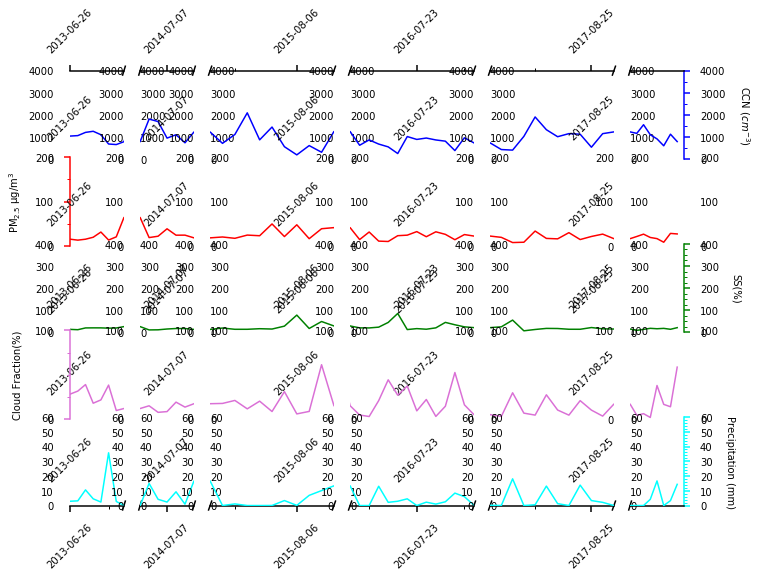

In [30]:
# Initialize XGrid and twin axes
ex2 = trendvis.XGrid([5, 5,5,5,5], xratios=[1, 1,2,2,2,1], figsize=(11, 8),
                     startside='right')
#ex2.make_twins([0, 1])

# Convenience function
trendvis.plot_data(ex2,
    [[(ind, avg_prl['CCN_1.0_cm3'], 'blue')],
     [(ind, avg_prl["PM25"], 'red')],
     [(ind, avg_prl["SS_1.0_mg"]*100, 'green')],
     [(ind, avg_prl["Cloud_fra"]*100, 'orchid')],
     [(ind, avg_prl["rain"]/10, 'cyan')]],
    lw=1.5, marker=None)

# Adjust twinned y-axis positions for readability
ex2.move_spines(twin_shift=0.6)

# For any other kind of plot (fill_between, scatter, errorbar, etc),
# get axis and plot directly
# Note: ex2.axes[2][2] == ex2.get_axis(0, xpos=2, is_twin=True)
#for ax in ex2.axes[2]:
#    ax.fill_between(ind, avg_prl["Cloud_fra"]*100+0.1, avg_prl["Cloud_fra"]*100-0.1,
 #                   edgecolor='none', color='darkorange')

# Handle axis ticks
ex2.cleanup_grid()
ex2.set_spinewidth(1.5)
ex2.autocolor_spines()
ex2.set_all_ticknums([(20, 5), (10, 5),(20, 5),(10, 5),(15, 5),(40, 20)],
                     [(1000, 500), (100, 50), (100, 25), (100, 25),(10, 2)])
ex2.set_ticks(major_dim=(6, 1.5), minor_dim=(3, 1))

ex2.set_ylabels(['CCN $(cm^{-3})$', 'PM$_{2.5}$ μg/m$^{3}$', 'SS(%)', 'Cloud Fraction(%)',"Precipitation (mm)"])

# Rotate x-axis tick labels
for ax in ex2.fig.axes:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Draw a vertical bar behind the data - horizontal bars available too
#ex2.draw_bar(ex2.axes[4][0], ex2.axes[0][0], (1, 4), color='lightblue')
#ex2.draw_bar(ex2.axes[4][0], ex2.axes[0][0], (22, 26), color='lightblue')
#ex2.draw_bar(ex2.axes[4][0], ex2.axes[0][0], (60, 69), color='lightblue')
#ex2.draw_bar(ex2.axes[4][0], ex2.axes[0][0], (75, 82), color='lightblue')
#ex2.draw_bar(ex2.axes[4][0], ex2.axes[0][0], (103, 106), color='lightblue')

# Ok to set axis limits after drawing on figure using TrendVis methods,
# TrendVis will reset the bar to the right place!
ex2.set_xlim([(0, 0, 7), (1, 7, 13),(2, 13, 23),(3, 23, 36),(4, 36, 47),(5, 47, 55)])
ex2.set_ylim([(0, 0, 4000),(1, 0, 200),(2, 0, 400),(3, 0, 100),(4, 0, 60)])

# matplotlib annotations supported
#ex2.get_axis(0).text(0, 0.75, 'Text')

# Cutouts instead of frames
ex2.draw_cutout(lw=1.5)

# Set the suptitle and compact the plot
#ex2.fig.suptitle('YRD', fontsize=16, y=1.05);
ex2.fig.subplots_adjust(hspace=-0.1,wspace=0.3)
times=pd.to_datetime(avg_prl.index,format='%Y-%m-%d')
date = times.astype('O')
ex2.get_axis(1).xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ex2.axes[0][1].xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ex2.axes[0][2].xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ex2.axes[0][3].xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ex2.axes[0][4].xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ex2.axes[0][5].xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
#ex2.get_axis().xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
plt.savefig("prl_ccn_series-filter.png",dpi=600)

In [21]:
plt.savefig("time_series-filter.png",dpi=600)

<Figure size 432x288 with 0 Axes>